In [1]:
from PIL import Image
import numpy as np
from algorithme.admmp2 import ADMMP2, ADMMP2_v2

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#x = np.array(Image.open('../image/cameraman.tif').convert('L'))
x = np.array(Image.open('../image/jerem.jfif').convert('L'))
xref = x
h = 1/16 * np.array([[1,2,1],
                     [2,4,2],
                     [1,2,1]])

h = np.ones((9,9))
h = h / np.linalg.norm(h)**2

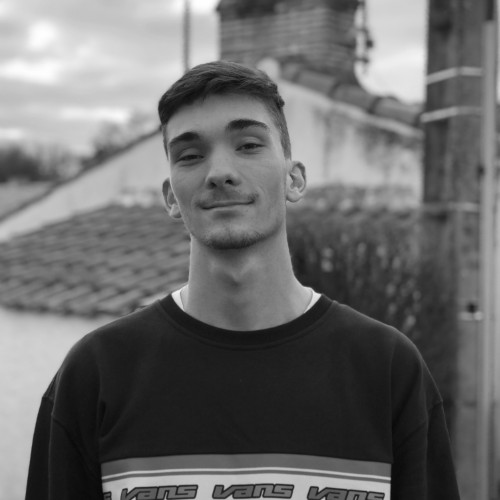

In [4]:
Image.fromarray(np.uint8(x))

In [11]:
x_max = np.max(x/255.)
lambd = 2e-17
mu = 2e-4
nu_min = 4.3
nu = 2**8 * lambd * nu_min/(mu*x_max)
nu = 0.5

In [12]:
algo = ADMMP2_v2(x/255., h, lambd=lambd, mu=mu, nu=nu)

In [13]:
y = algo.gaussian_filter_2d()

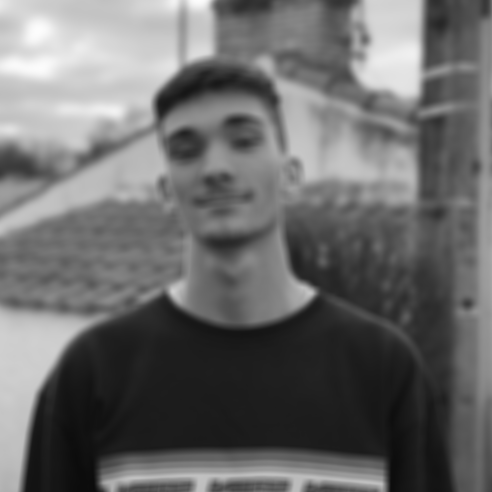

In [1573]:
Image.fromarray(np.uint8(y*255))

In [1574]:
X_, iter,tabError,tabTime, tabBSNR, tabLagran = algo.fit_transform(y, eps=10e-9, stop=2500)

(500, 500) (500, 500) (500, 500)


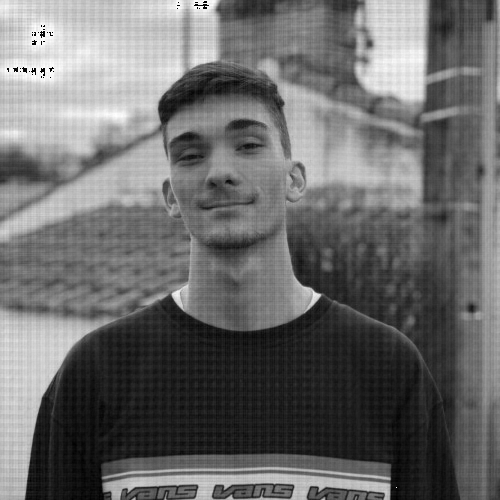

In [1575]:
Image.fromarray(np.uint8(X_*255))

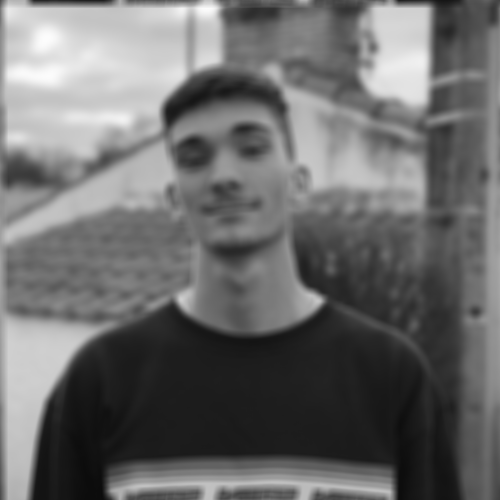

In [1576]:
Image.fromarray(np.uint8(algo.rfft_dot(X_, algo.A_fft)*255))

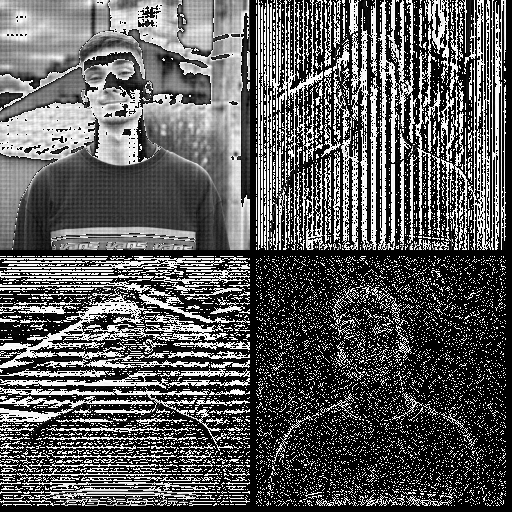

In [1577]:
Image.fromarray(np.uint8(algo.wavelet_transform(X_)*255))

In [1578]:
algo.plot_convergence_iter(tabLagran, np.arange(0, iter+1, 1), "Evolution du Lagrangien <br><sup>Algorithme ADMMP2 </sup>", 'iter', "L")

In [1579]:
algo.plot_convergence_iter(20*np.log10(tabError), tabTime, "Evolution de l'erreur <br><sup>Algorithme ADMMP2 </sup>", 'iter', r'$20log_{10}(||x-x_{\inf}||/||x_{\inf}||)$')